# Prediction Plots

## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Import Files

In [11]:
full_df = pd.read_csv("../../../Data_thesis/Full_Datasets/FullDF.csv")
full_df["Date"] = pd.to_datetime(full_df["Date"], format="%Y-%m-%d")
full_df = full_df[(full_df["Date"] == pd.Timestamp(2019,3,23)) | (full_df["Date"] == pd.Timestamp(2019,3,24))].reset_index().drop(columns=["index"])
full_df = full_df[full_df["Sensor"] == "GAWW-01"]
full_df["Date"] +=  pd.to_timedelta(full_df["Hour"]/100, unit='h')
full_df.sort_values(by=["Date"], inplace=True)

In [3]:
rfg_df = pd.read_csv("../../../Data_thesis/Full_Datasets/rfg_Predictions.csv")
rfg_df["Date"] = pd.to_datetime(rfg_df["Date"], format="%Y-%m-%d")
rfg_df["Date"] +=  pd.to_timedelta(rfg_df["Hour"]/100, unit='h')
rfg_df.sort_values(by=["Date"], inplace=True)

xgbr_df = pd.read_csv("../../../Data_thesis/Full_Datasets/xgbr_Predictions.csv")
xgbr_df["Date"] = pd.to_datetime(xgbr_df["Date"], format="%Y-%m-%d")
xgbr_df["Date"] +=  pd.to_timedelta(xgbr_df["Hour"]/100, unit='h')
xgbr_df.sort_values(by=["Date"], inplace=True)

In [4]:
rfc_df = pd.read_csv("../../../Data_thesis/Full_Datasets/rfc_Predictions.csv")
rfc_df["Date"] = pd.to_datetime(rfc_df["Date"], format="%Y-%m-%d")
rfc_df["Date"] +=  pd.to_timedelta(rfc_df["Hour"]/100, unit='h')
rfc_df.sort_values(by=["Date"], inplace=True)

xgbc_df = pd.read_csv("../../../Data_thesis/Full_Datasets/xgbc_Predictions.csv")
xgbc_df["Date"] = pd.to_datetime(xgbc_df["Date"], format="%Y-%m-%d")
xgbc_df["Date"] +=  pd.to_timedelta(xgbc_df["Hour"]/100, unit='h')
xgbc_df.sort_values(by=["Date"], inplace=True)

In [5]:
def classCrowdednessCounts(df):
    low_split = df["CrowdednessCount"].quantile(.25)
    mid_split = df["CrowdednessCount"].quantile(.5)
    high_split = df["CrowdednessCount"].quantile(.75)

    clas_dict = df.to_dict("index")

    for k, v in clas_dict.items():
        if v["CrowdednessCount"] < low_split:
            v["CrowdednessCount"] = 1
        elif v["CrowdednessCount"] >= low_split and v["CrowdednessCount"] < mid_split:
            v["CrowdednessCount"] = 2
        elif v["CrowdednessCount"] >= mid_split and v["CrowdednessCount"] < high_split:
            v["CrowdednessCount"] = 3
        elif v["CrowdednessCount"] >= high_split:
            v["CrowdednessCount"] = 4
        else:
            print(k, " has class error as it fits in none")

    df = pd.DataFrame.from_dict(clas_dict, orient="index")

    return df

In [13]:
df = pd.read_csv("../../../Data_thesis/Full_Datasets/FullDF.csv")
clas_df = classCrowdednessCounts(df)
clas_df["Date"] = pd.to_datetime(clas_df["Date"], format="%Y-%m-%d")
clas_df = clas_df[(clas_df["Date"] == pd.Timestamp(2019,3,23)) | (clas_df["Date"] == pd.Timestamp(2019,3,24))].reset_index().drop(columns=["index"])
clas_df = clas_df[clas_df["Sensor"] == "GAWW-01"]
clas_df["Date"] +=  pd.to_timedelta(clas_df["Hour"]/100, unit='h')
clas_df.sort_values(by=["Date"], inplace=True)

## Plots

In [14]:
x_1 = rfg_df["CrowdednessCount"].values.reshape(-1,1)
x_2 = xgbr_df["CrowdednessCount"].values.reshape(-1,1)
x_3 = full_df["CrowdednessCount"].values.reshape(-1,1)
date = xgbr_df["Date"].values.reshape(-1,1)

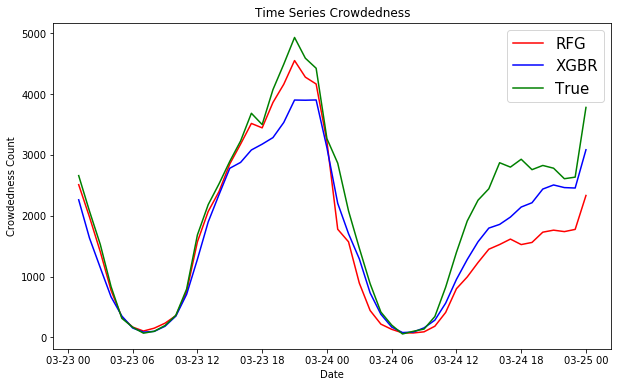

In [15]:
plt.figure(figsize=(10,6))
plt.plot(date,x_1, "r", label="RFG")
plt.plot(date,x_2, "b", label="XGBR")
plt.plot(date,x_3, "g", label="True")


plt.legend(prop={"size": 15})
plt.xlabel("Date")
plt.ylabel("Crowdedness Count")
plt.title("Time Series Crowdedness")
plt.savefig('../../../Data_thesis/Useful/reg_timeSeries.png')

In [16]:
x_1 = rfc_df["CrowdednessCount"].values.reshape(-1,1)
x_2 = xgbc_df["CrowdednessCount"].values.reshape(-1,1)
x_3 = clas_df["CrowdednessCount"].values.reshape(-1,1)
date = xgbc_df["Date"].values.reshape(-1,1)

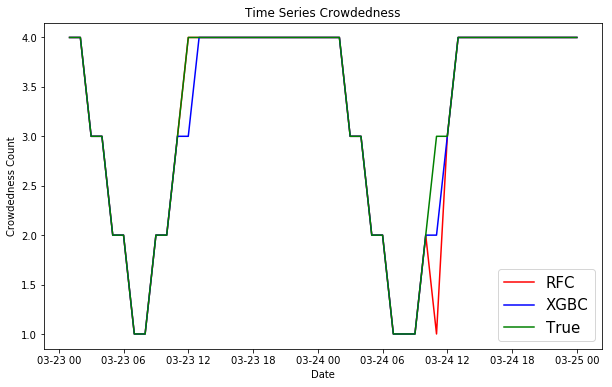

In [17]:
plt.figure(figsize=(10,6))
plt.plot(date,x_1, "r", label="RFC")
plt.plot(date,x_2, "b", label="XGBC")
plt.plot(date,x_3, "g", label="True")


plt.legend(prop={"size": 15})
plt.xlabel("Date")
plt.ylabel("Crowdedness Count")
plt.title("Time Series Crowdedness")
plt.savefig('../../../Data_thesis/Useful/clas_timeSeries.png')